In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import sklearn
from sklearn.decomposition import PCA

In [7]:
#数据预处理，不含归一化
C = 2  # 类别数量
df_wine_white = pd.read_csv(r'data/winequality-white.csv', header=0, sep=',')
df_wine_white.insert(12,'label',int(0))
df_wine_red = pd.read_csv(r'data/winequality-red.csv', header=0, sep=',')
df_wine_red.insert(12,'label',int(1))
df_wine = pd.concat((df_wine_red,df_wine_white),axis = 0,join = 'outer')
df_wine = df_wine.to_numpy()
# 设置随机种子
np.random.seed(42)
np.random.shuffle(df_wine)
X = df_wine[:, :-1]
X = np.array(X)
y = df_wine[:, -1]
print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


In [30]:
#sklearn逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.98


In [31]:
#sklearn归一化并且逻辑回归
from sklearn.preprocessing import StandardScaler

# 创建StandardScaler对象
scaler = StandardScaler()

# 对特征矩阵进行归一化处理
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9938461538461538


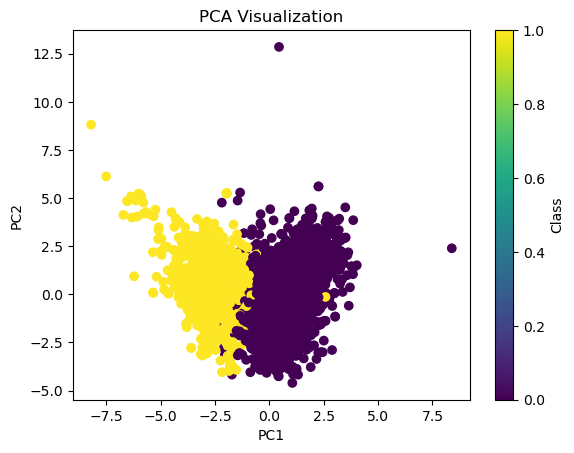

In [55]:
#sklearn归一化后进行pca并可视化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 创建PCA对象，指定降维后的维度为2
pca = PCA(n_components=2)

# 对特征矩阵进行降维
X_pca = pca.fit_transform(X_normalized)

# 绘制散点图，不同类别使用不同颜色表示
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.colorbar(label='Class')
plt.show()


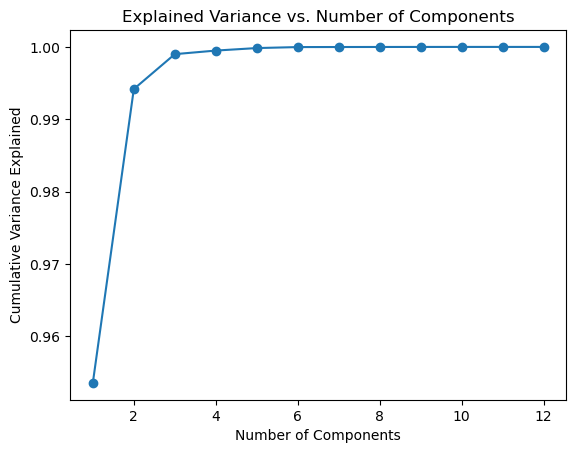

In [46]:
#sklearn最佳k值确定
from sklearn.decomposition import PCA

# 创建PCA对象
pca = PCA()

# 对特征矩阵进行PCA降维
pca.fit(X)

# 获取每个主成分的方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计方差解释比例
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 绘制方差解释比例曲线
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Explained Variance vs. Number of Components')
plt.show()


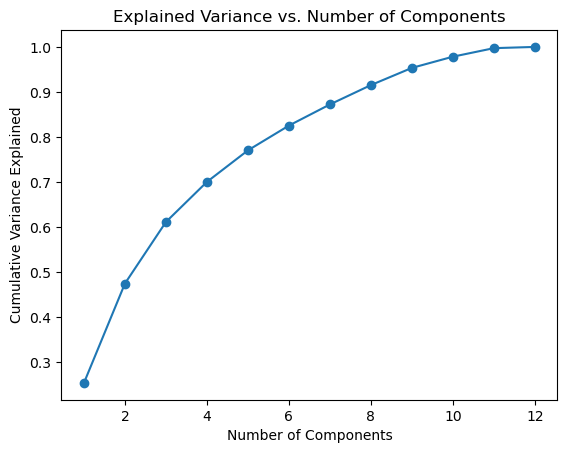

In [45]:
#归一化后最佳维度确定
from sklearn.decomposition import PCA

# 创建PCA对象
pca = PCA()

# 对特征矩阵进行PCA降维
pca.fit(X_normalized)

# 获取每个主成分的方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计方差解释比例
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 绘制方差解释比例曲线
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Explained Variance vs. Number of Components')
plt.show()


In [42]:
#PCA后利用逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 创建PCA对象，指定降维后的维度为2
pca = PCA(n_components=11)

# 对特征矩阵进行降维
X_pca = pca.fit_transform(X_normalized)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9892307692307692


Linear Discriminant 1: 1.0000


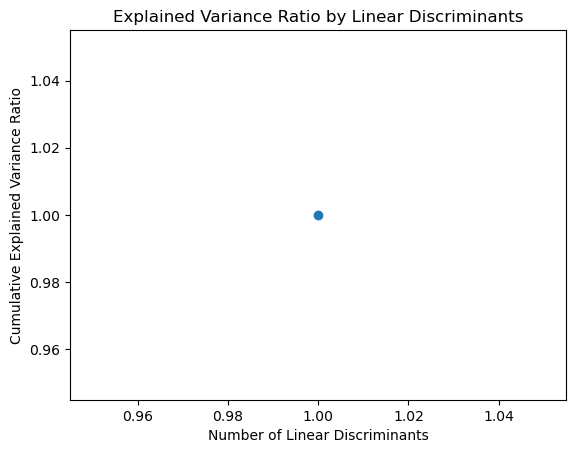

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 创建LDA对象
lda = LinearDiscriminantAnalysis()

# 对特征矩阵和标签矩阵进行LDA降维
X_lda = lda.fit_transform(X, y)

# 获取每个线性判别分量的方差解释比例
variance_ratios = lda.explained_variance_ratio_

# 打印方差解释比例
for i, ratio in enumerate(variance_ratios):
    print(f"Linear Discriminant {i+1}: {ratio:.4f}")

# 绘制方差解释比例曲线图
plt.plot(range(1, len(variance_ratios)+1), np.cumsum(variance_ratios), marker='o')
plt.xlabel('Number of Linear Discriminants')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Linear Discriminants')
plt.show()


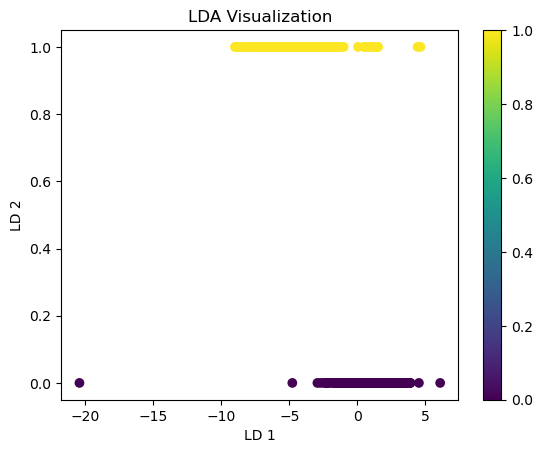

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# 创建LDA对象
lda = LinearDiscriminantAnalysis(n_components=1)

# 对特征矩阵和标签矩阵进行LDA降维
X_lda = lda.fit_transform(X, y)

# 绘制降维后的数据点
plt.scatter(X_lda[:, 0],y, c=y, cmap='viridis')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('LDA Visualization')
plt.colorbar()
plt.show()
